# 时间序列处理

In [63]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

In [65]:
cur = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')

In [66]:
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


### 时间序列的可视化

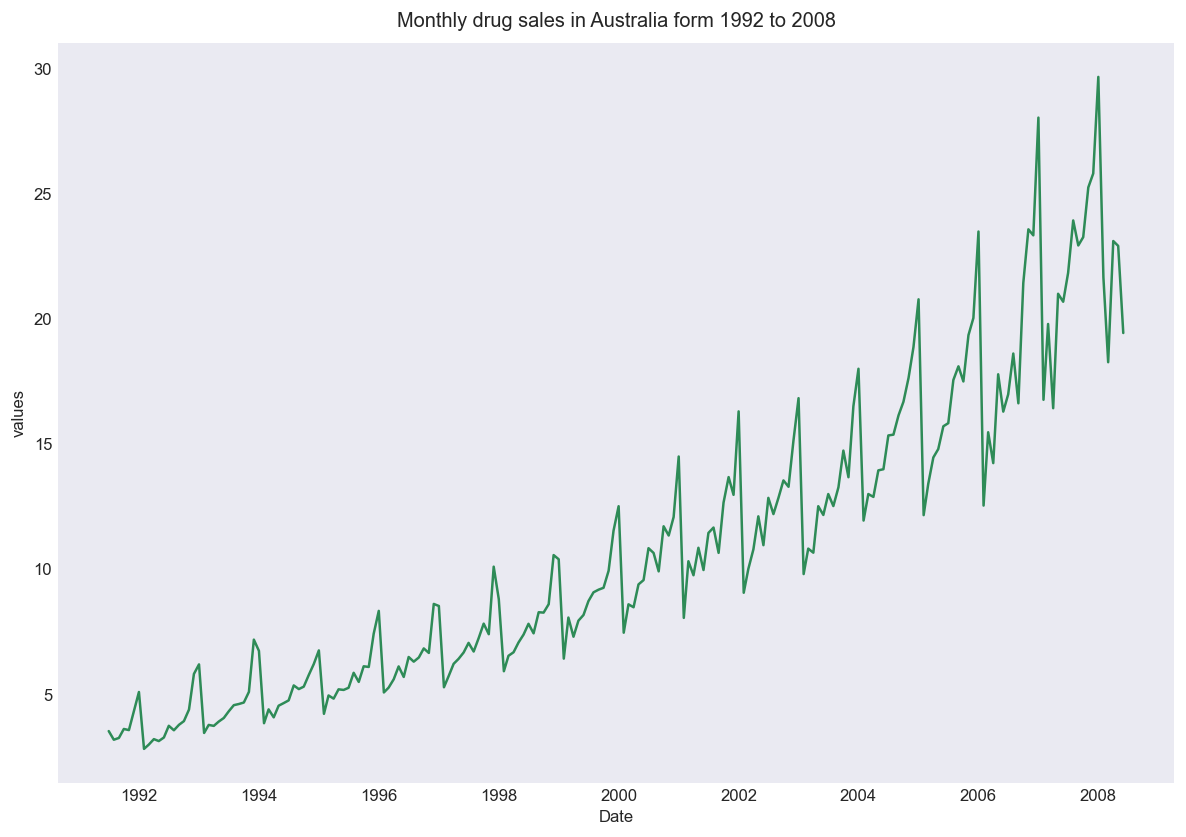

In [67]:
plt.figure(figsize=(12, 8), dpi=120)
plt.title('Monthly drug sales in Australia form 1992 to 2008')
plt.plot(df['date'], df['value'], color='seagreen')
plt.xlabel('Date')
plt.ylabel('values')
plt.grid(False)
plt.show()

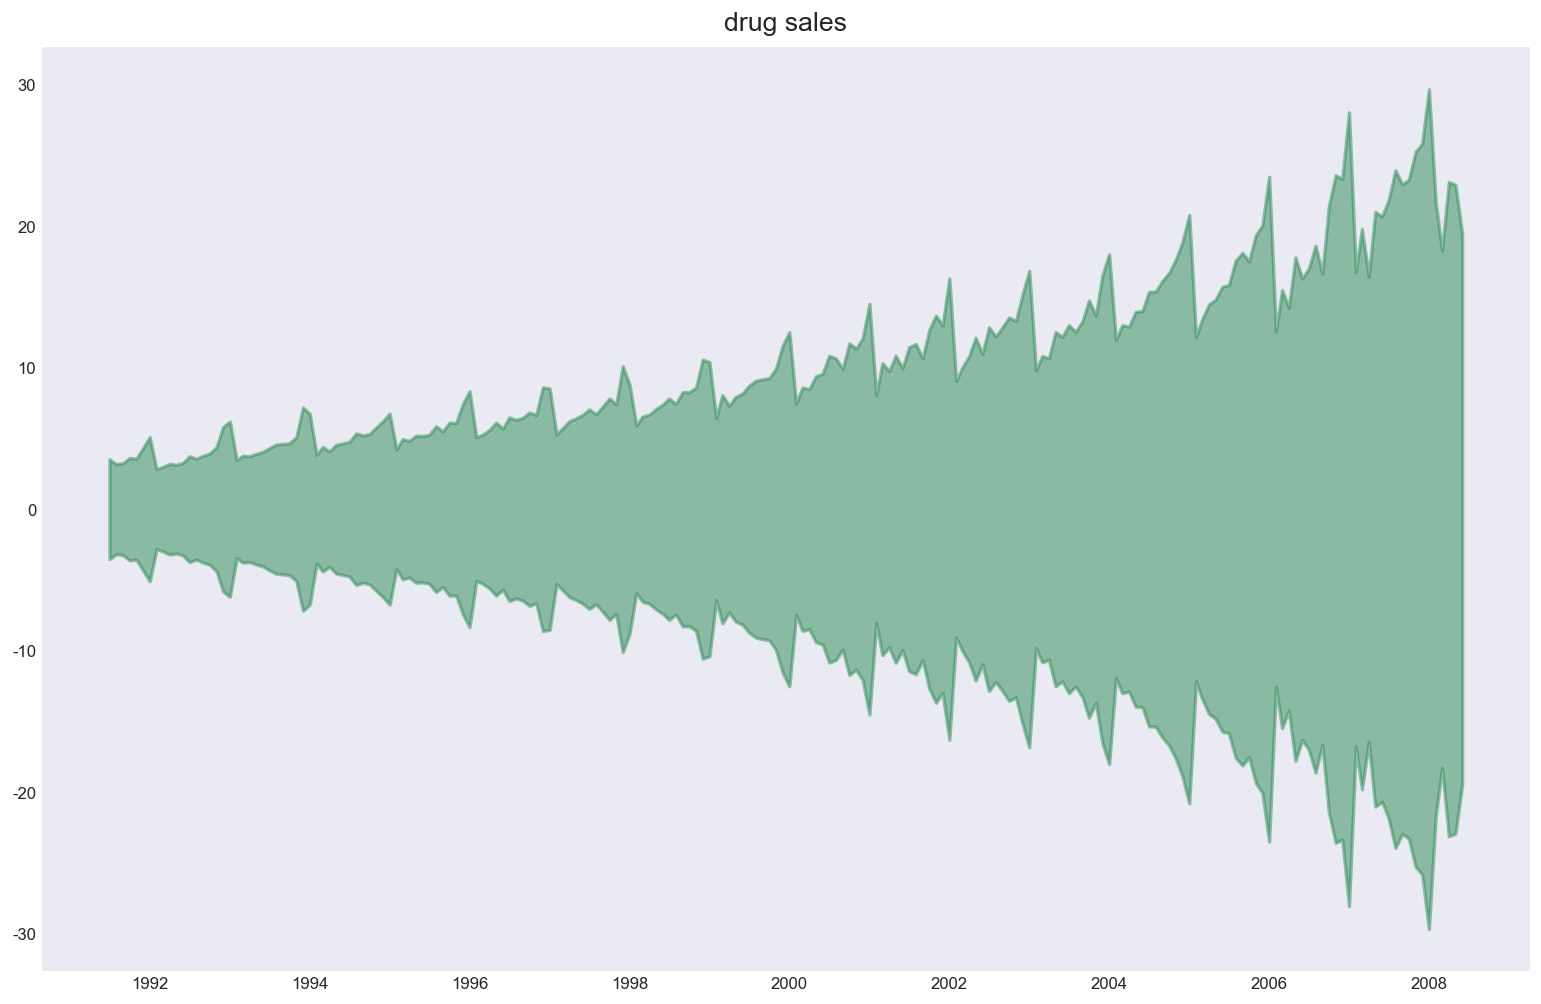

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10), dpi=120)
plt.fill_between(x=df['date'], y1=df['value'], y2=-df['value'], alpha=0.5, linewidth=2, color='seagreen')
# plt.ylim(-15,15)
plt.title('drug sales', fontsize=16)
plt.grid(False)
plt.show()

**时间序列的季节图**

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

In [70]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


`strftime()`:该函数用于将日期转化为字符串表示的日期

TypeError: _make_class_factory.<locals>.class_factory.<locals>.subcls.set() takes 1 positional argument but 3 were given

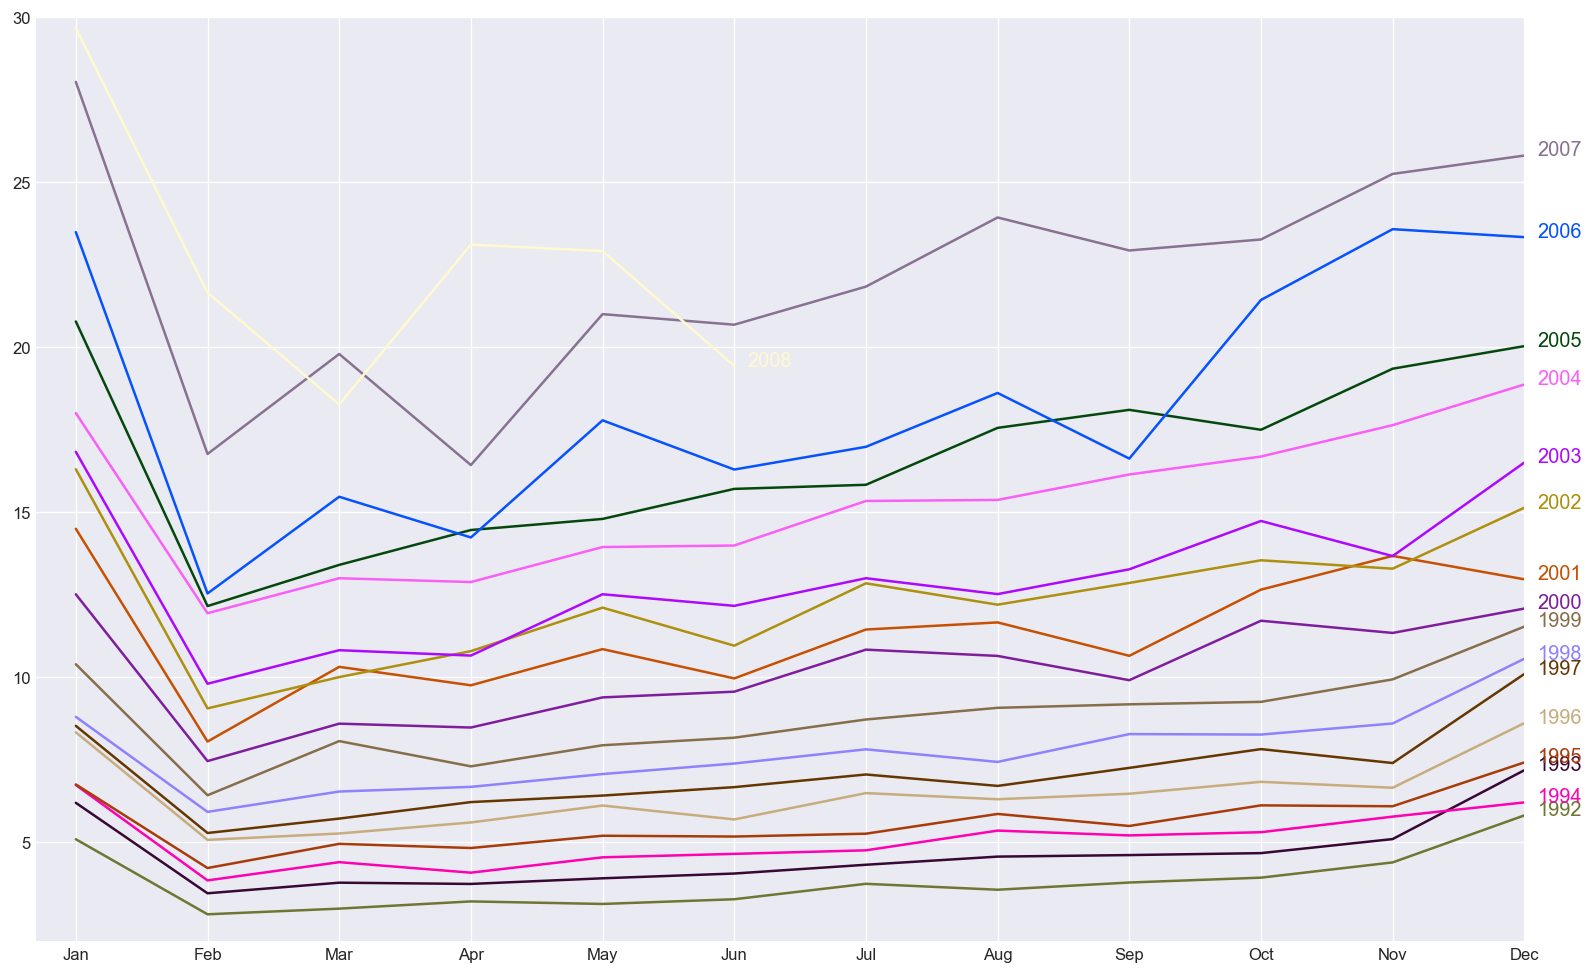

In [71]:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years))

plt.figure(figsize=(16, 10), dpi=120)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year == y, :], color=mycolors[i])
        plt.text(df.loc[df.year == y, :].shape[0] - .9, df.loc[df.year == y, 'value'][-1:].values[0], y, fontsize=12,
                 color=mycolors[i])
plt.gca().set(plt.xlim(-0.3, 11), plt.ylim(2, 30), ylabel='$DrugSales$', xlabel='Months')
plt.show()

**绘制出季节变化**

### 绘制箱线图

<AxesSubplot: xlabel='month', ylabel='value'>

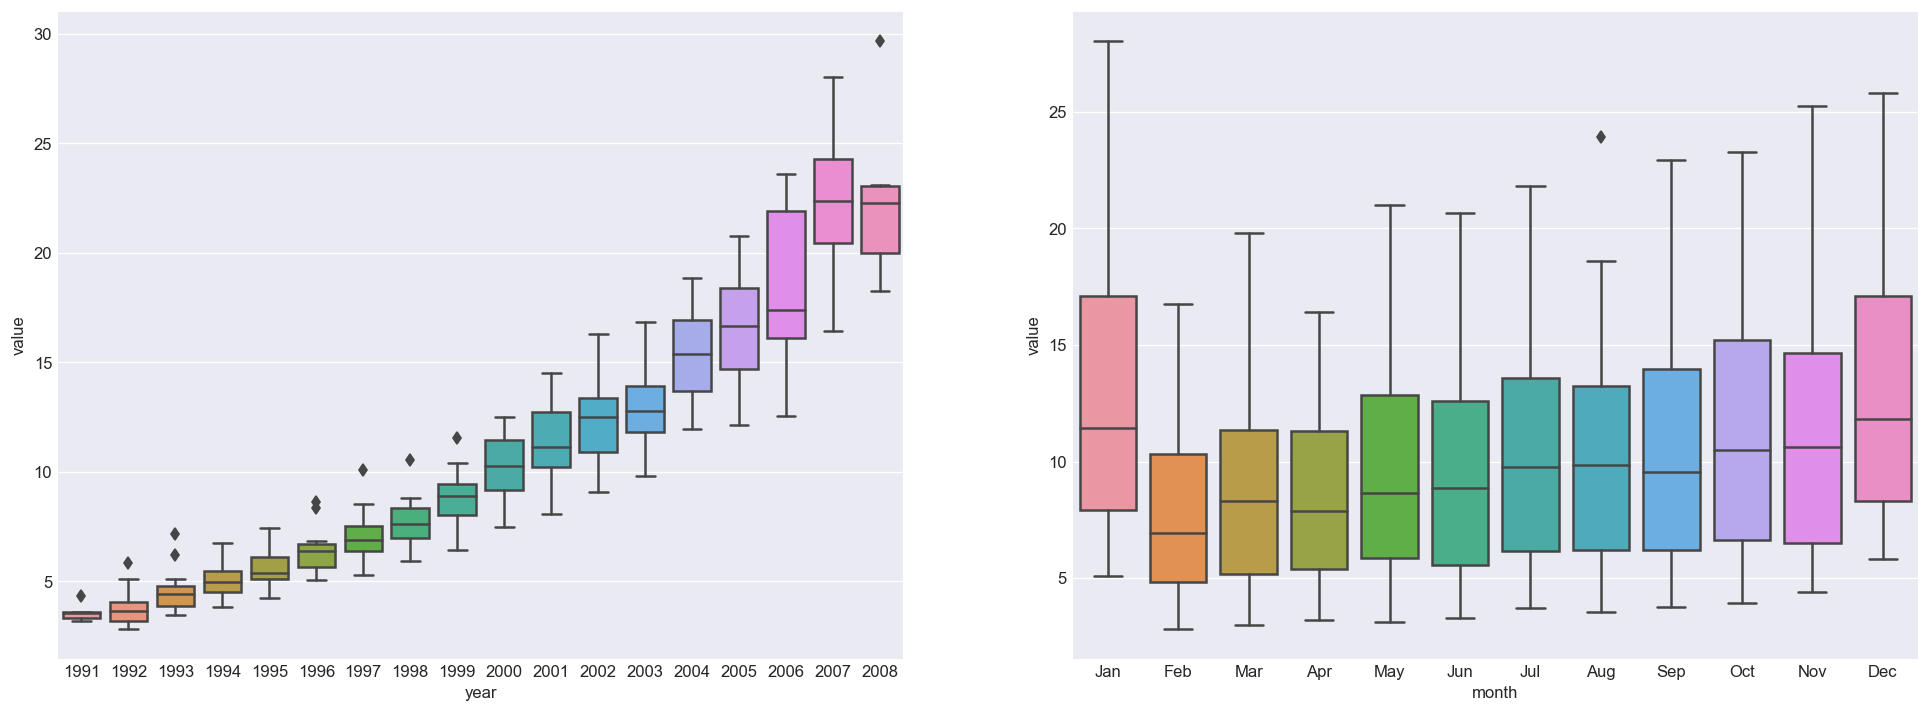

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=120)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

In [73]:
df.loc[~df.year.isin([1991, 2008]), :]

,date,value,year,month
6,1992-01-01,5.088335,1992,Jan
7,1992-02-01,2.814520,1992,Feb
8,1992-03-01,2.985811,1992,Mar
9,1992-04-01,3.204780,1992,Apr
10,1992-05-01,3.127578,1992,May
...,...,...,...,...
193,2007-08-01,23.930204,2007,Aug
194,2007-09-01,22.930357,2007,Sep
195,2007-10-01,23.263340,2007,Oct
196,2007-11-01,25.250030,2007,Nov


In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [75]:
df.index = df['date']

In [76]:
df = df.drop(['date', 'year', 'month'], axis=1)

In [77]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


### 分别使用乘法分解和加法分解来观察时间序列,得到结果:趋势,季节性变化,残差

In [78]:
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')  #乘法分解
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

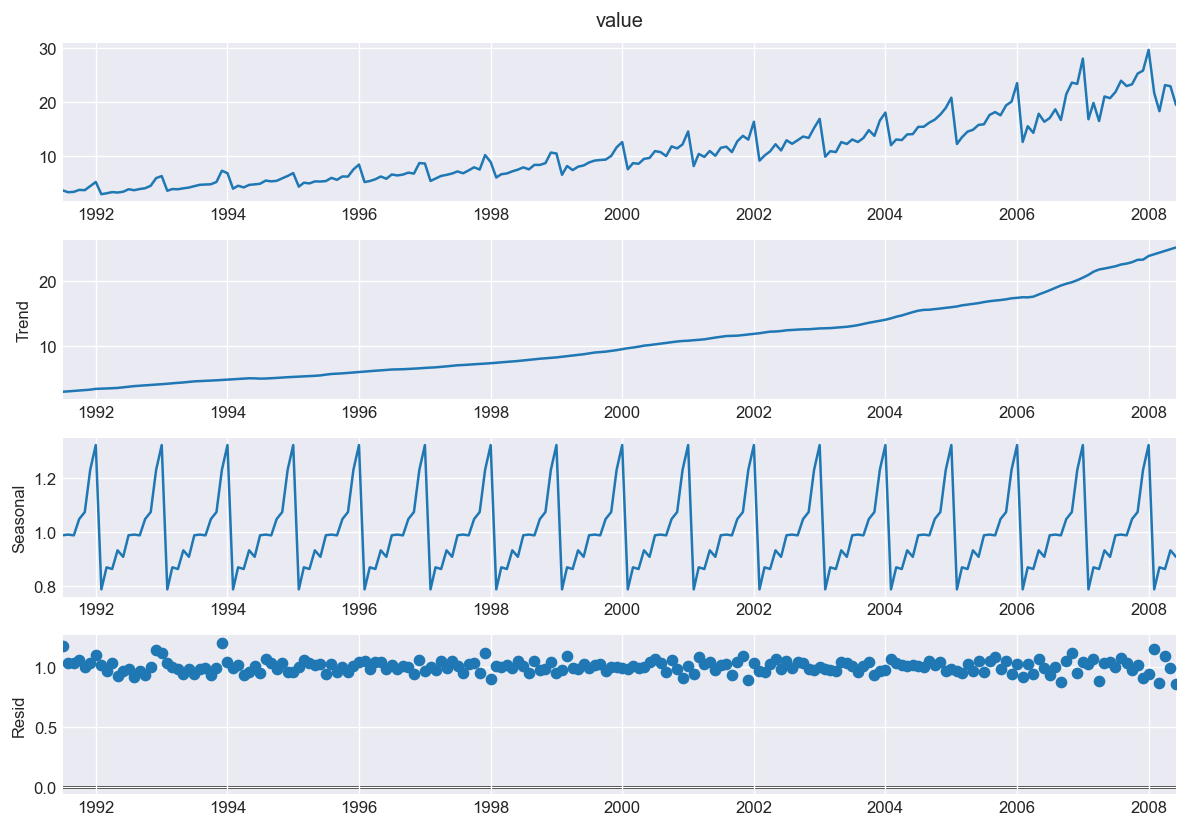

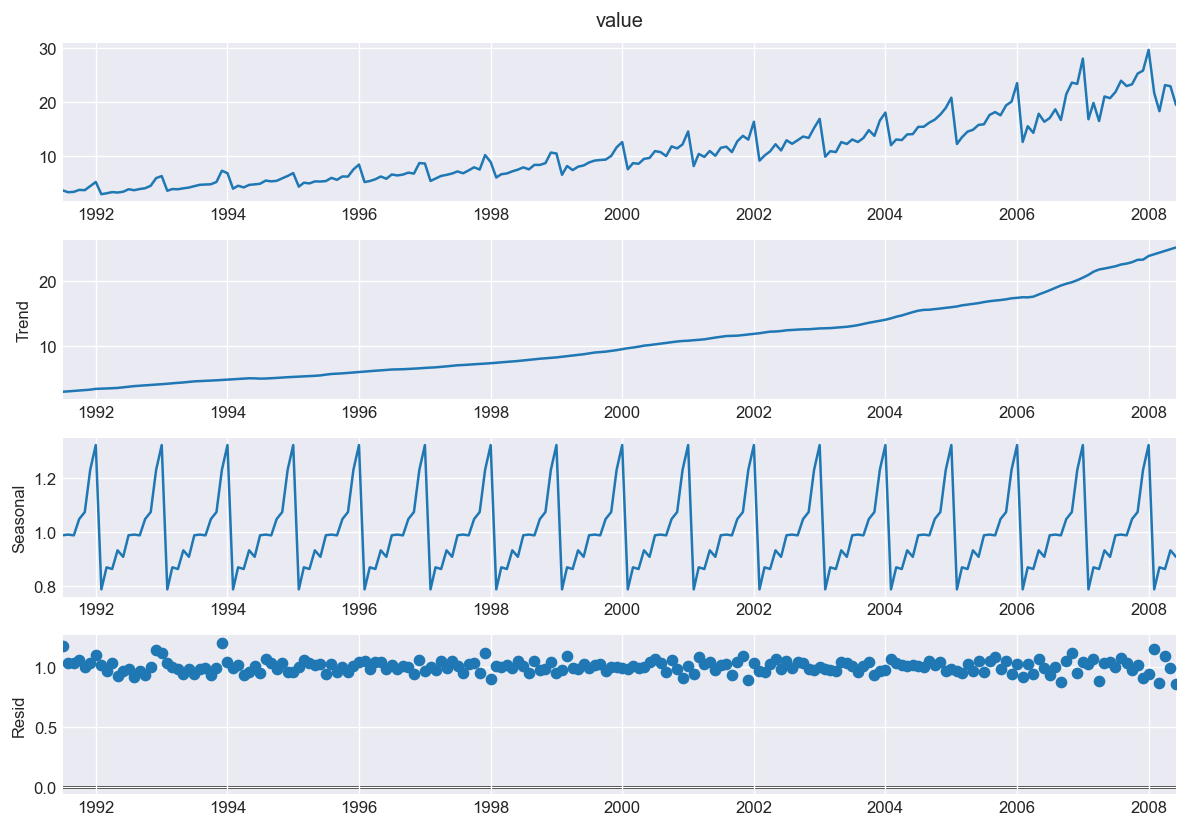

In [79]:
# result_add.plot()
# mpl.rcParams.update({'s':2})
# plt.rc('scatters',)
result_mul.plot()

### 非平稳数据平稳化
显然,我们所使用的数据序列是非平稳的,为了提升预测的准确性,我们需要对非平稳序列进行平稳化处理

In [80]:
from statsmodels.tsa.stattools import adfuller, kpss

In [81]:
result = adfuller(df, autolag='AIC')
result
# Augmented Dickey-Fuller unit root test.
# The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

(3.14518568930675,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

In [82]:
result = kpss(df, regression='c')
result
# Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.
# Computes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary.

(2.0131256386303322,
 0.01,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

**白噪音与平稳序列之间的差别:白噪不是时间的函数,他的均值和方差不随时间变化,白噪音完全随机,均值为$0$,从数学上来讲,均值为$0$的完全随机的数字序列就是白噪音**

Text(0.5, 1.0, '通过最小平方差拟合来去趋势化')

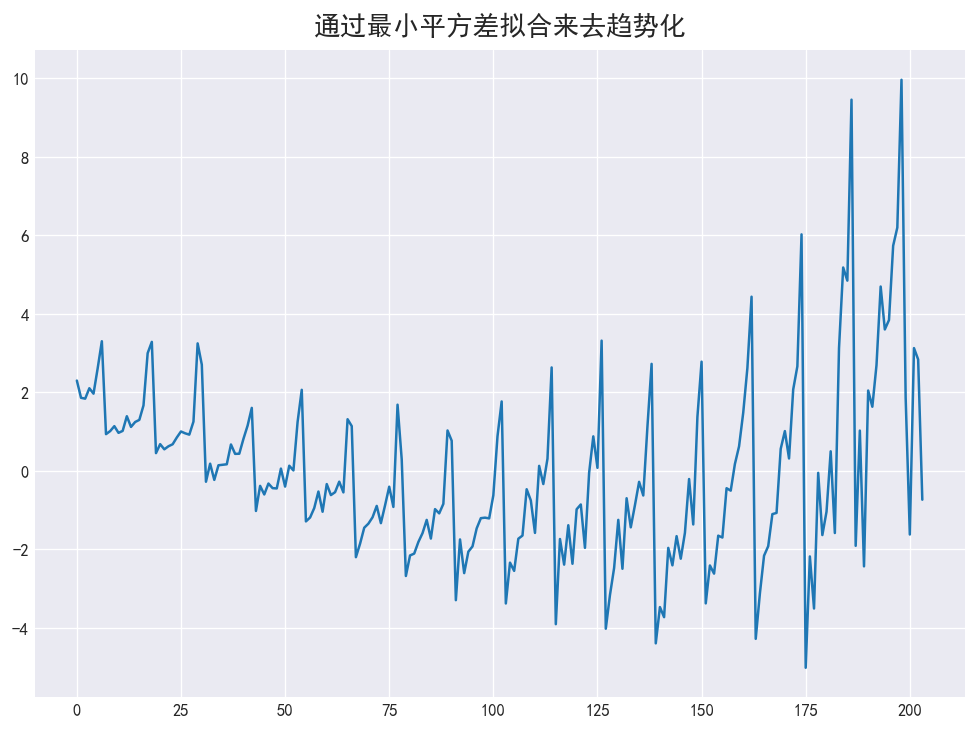

In [83]:
# Using scipy: Subtract the line of best fit
from scipy import signal

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
# detrend(): remove the linear trend from axis
plt.plot(detrended)
plt.title('通过最小平方差拟合来去趋势化', fontsize=16)

In [84]:
df.index = df['date']
df = df.drop('date', axis=1)

Text(0.5, 1.0, '通过最小二乘拟合来使时间序列去趋势化')

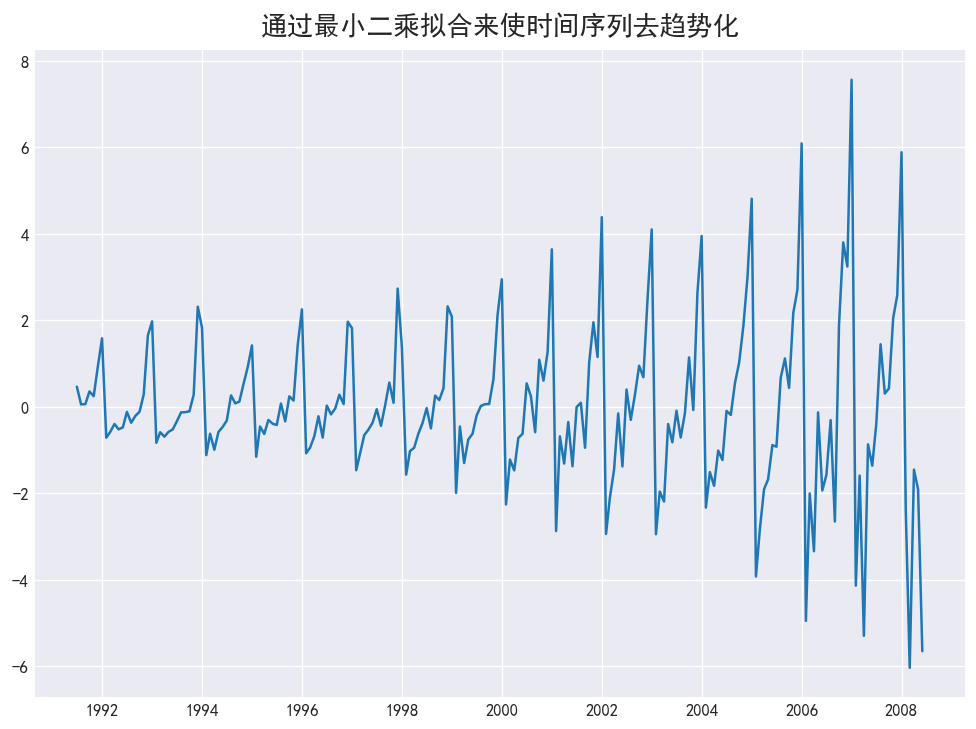

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend  # 除以trend会产生所有的年份的销售额期望值均相同的效果
plt.plot(detrended)
plt.title('通过最小二乘拟合来使时间序列去趋势化', fontsize=16)

**减去残差减去季节性变化**

Text(0.5, 1.0, '时间序列去季节化')

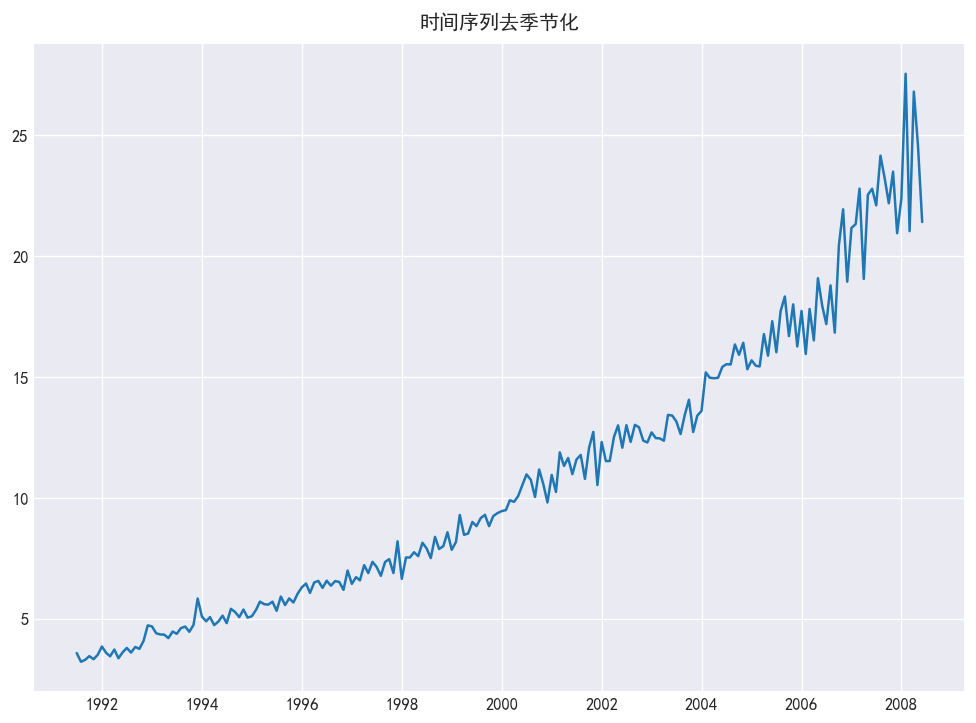

In [86]:
plt.plot((df.value.values / result_mul.seasonal))
plt.title('时间序列去季节化')

### 时间序列去季节化
1. 取一个长度为季节窗口的移动平均线,是序列变得平滑
2. 序列季节性差分(从当前值减去前一季节的数值)
3. 将序列值除以从STL分解当中获得的季节性指数

Text(0.5, 1.0, '药品销售序列去季节化')

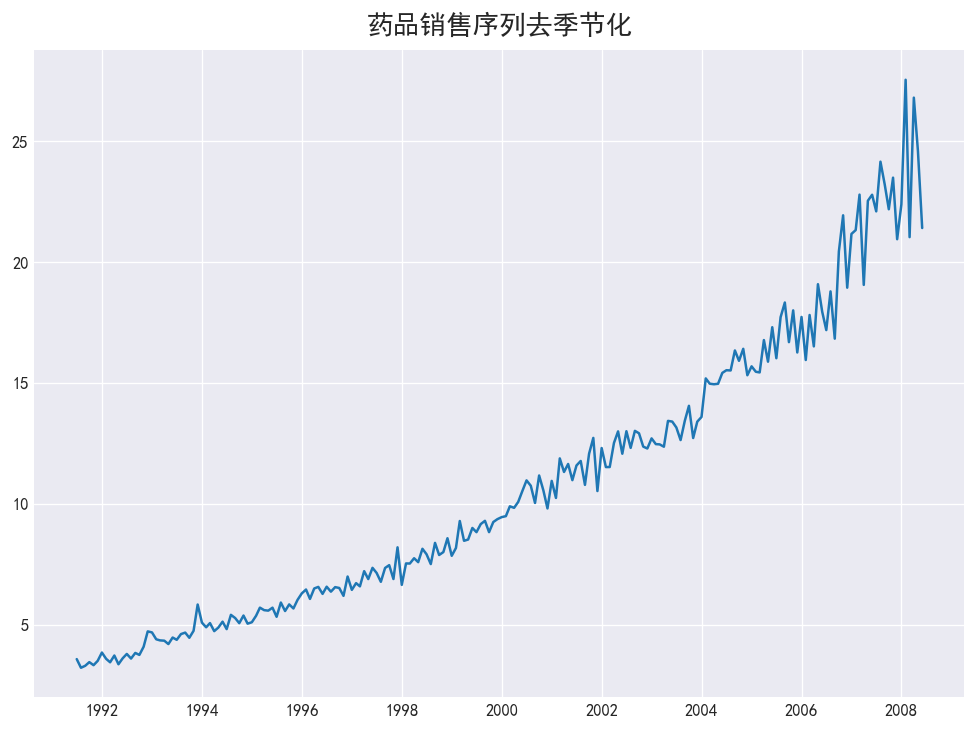

In [87]:
# 去季节化
deseasonlize = df.value.values / result_mul.seasonal
plt.plot(deseasonlize)
plt.title('药品销售序列去季节化', fontsize=16)

### 检验时间序列的季节性

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

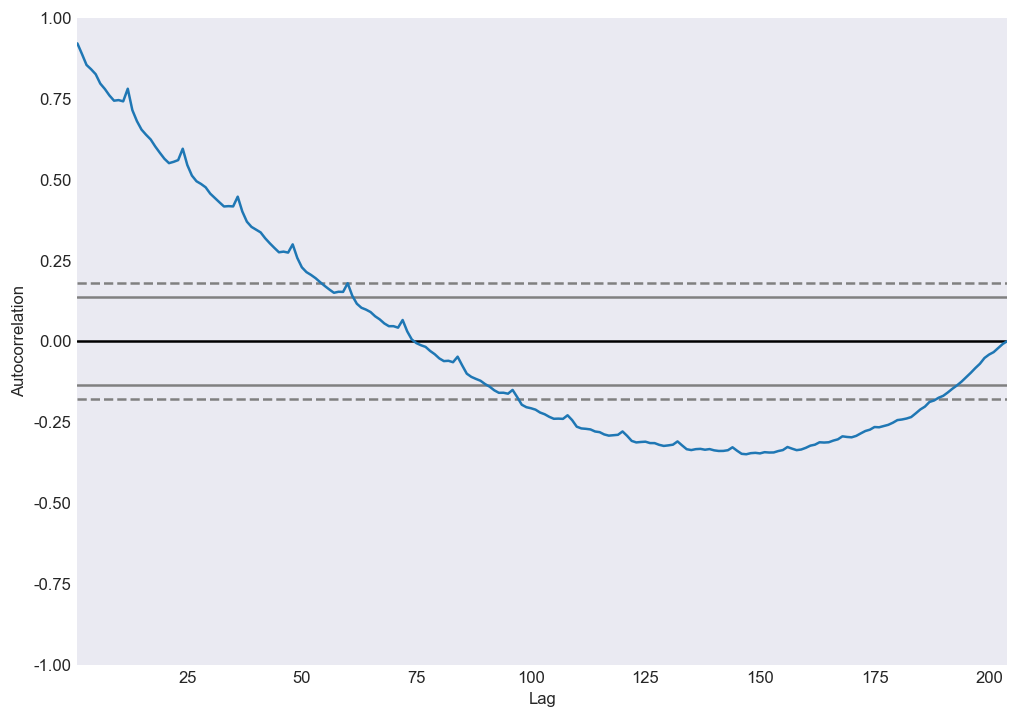

In [88]:
from pandas.plotting import autocorrelation_plot

plt.style.use('seaborn-darkgrid')
# autocorrelation: 时间序列的autocorrelation,也就是自相关系数
autocorrelation_plot(df)

### 自相关系数和偏自相关系数

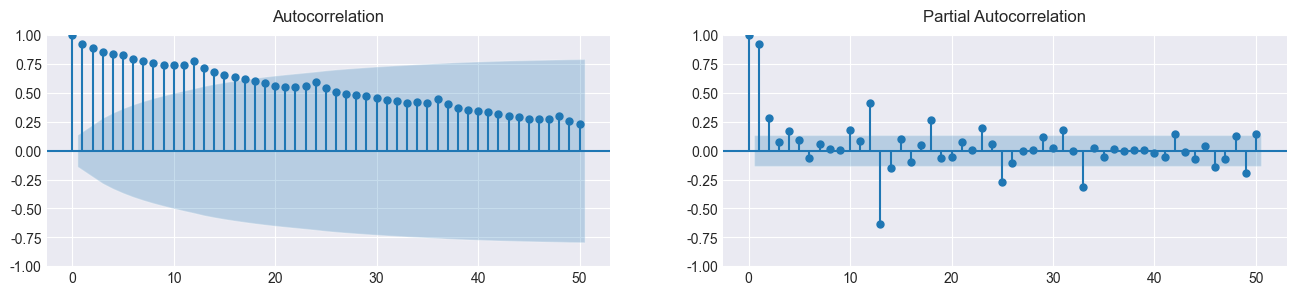

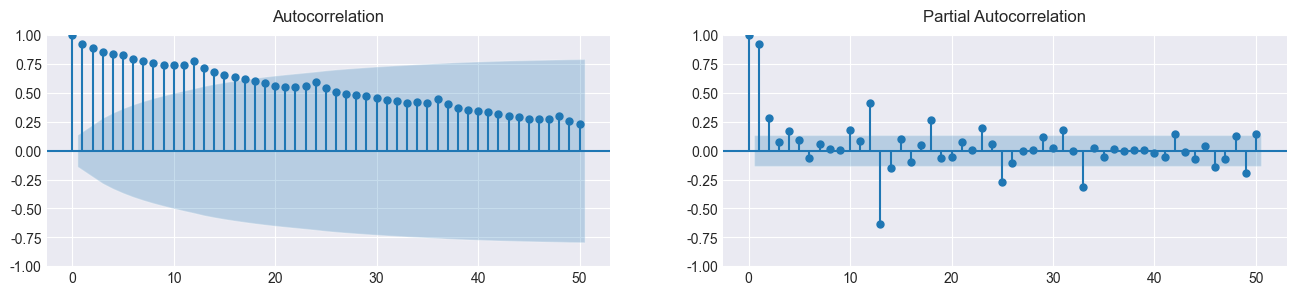

In [89]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=200)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)
plot_acf(df.value.values, lags=50, ax=axes[0])
plot_pacf(df.value.values, lags=50, ax=axes[1])

In [90]:
# plt.plot(acf_50)

### 缺失值的填充
向后填充；
线性内插；
二次内插；
最邻近平均值；
对应季节的平均值。


 缺失值处理

你也可以根据你想实现的精确程度考虑接下来的方法。

1. 如果你有解释变量，可以使用像随机森林或k-邻近算法的预测模型来预测它。

2. 如果你有足够多的过去观测值，可以预测缺失值。

3. 如果你有足够的未来观测值，回测缺失值。

4. 从之前的周期预测相对应的部分。



In [91]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'],
                      index_col='date').head(100)
df = pd.read_csv('datasets/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom': False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) + ")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) + ")", ax=axes[2], label='Back Fill',
                       color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset=['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) + ")", ax=axes[3], label='Cubic Fill', color='brown',
                       style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) + ")", ax=axes[4], label='Cubic Fill', color='red',
                      style=".-")


# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n / 2)
            lower = np.max([0, int(i - n_by_2)])
            upper = np.min([len(ts) + 1, int(i + n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out


df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) + ")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5,
                    style=".-")


## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i - 1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i - 1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out


df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) + ")", ax=axes[6], label='Seasonal Mean',
                         color='blue', alpha=0.5, style=".-")

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/a10_missings.csv'

#### 滞后图

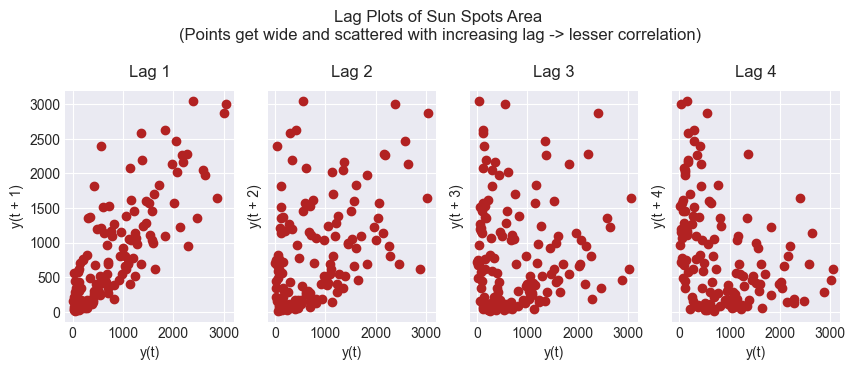

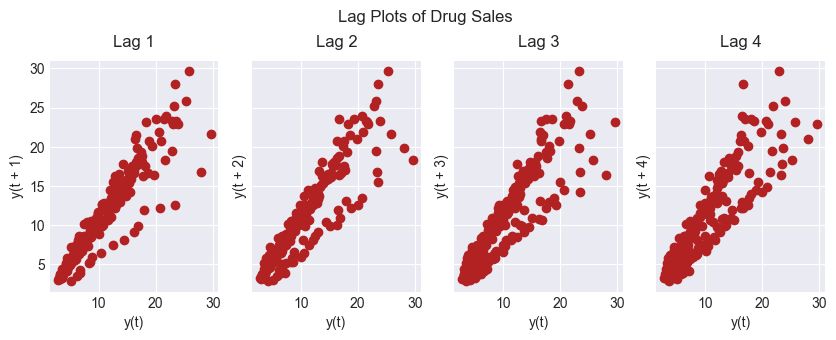

In [92]:
from pandas.plotting import lag_plot

plt.rcParams.update({'ytick.left': False, 'axes.titlepad': 10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i + 1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i + 1))

fig.suptitle(
    'Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)

fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i + 1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i + 1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)
plt.show()

### 差分

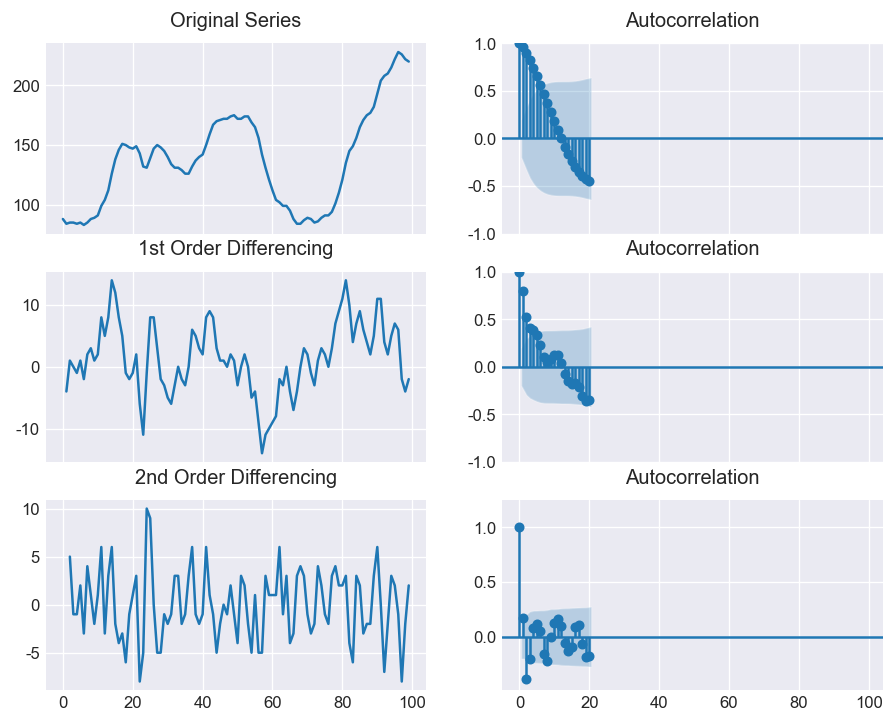

In [93]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value)
axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1], auto_ylims=True)

plt.show()

In [94]:
from pmdarima.arima.utils import ndiffs

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df.value

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
# ndiffs(y, test='kpss')  # 0

# PP test:
# ndiffs(y, test='pp')  # 2

2

### 创建ARMA模型

In [97]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [142]:
plt.rcParams.update({'figure.figsize': (9, 3), 'figure.dpi': 120})

#import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')
from statsmodels.datasets import sunspots

df = sunspots.load_pandas().data
df.index = df['YEAR']

KeyError: "['YEAR'] not found in axis"

In [148]:
df = df.drop('YEAR', axis=1)

KeyError: "['YEAR'] not found in axis"

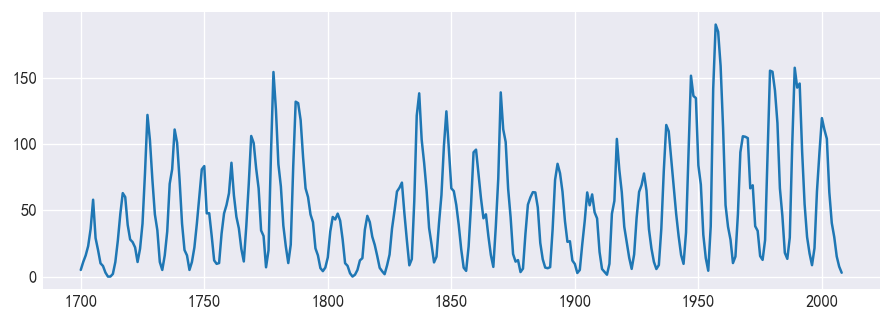

In [155]:
plt.plot(df)

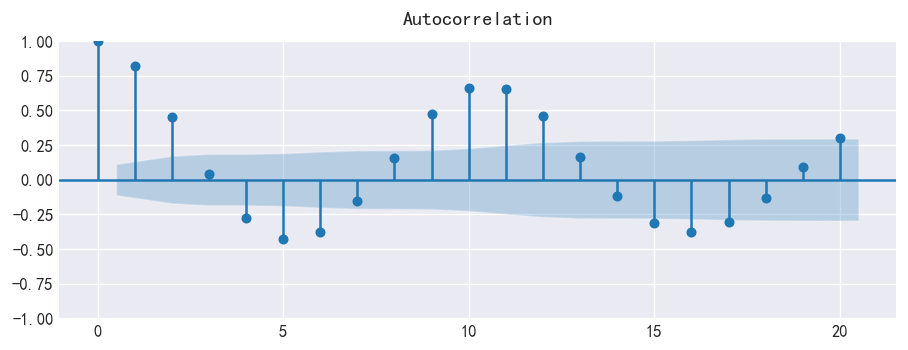

In [154]:
plot_acf(df.SUNACTIVITY.dropna(), lags=20)
plt.show()

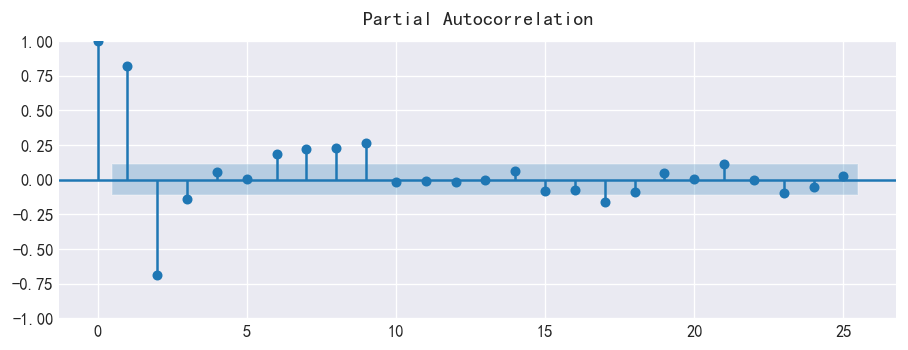

In [160]:
plot_pacf(df.SUNACTIVITY)
plt.show()

原序列是不平稳的,这一特征也可以从$ACF$图象之中收敛值>10可以得知

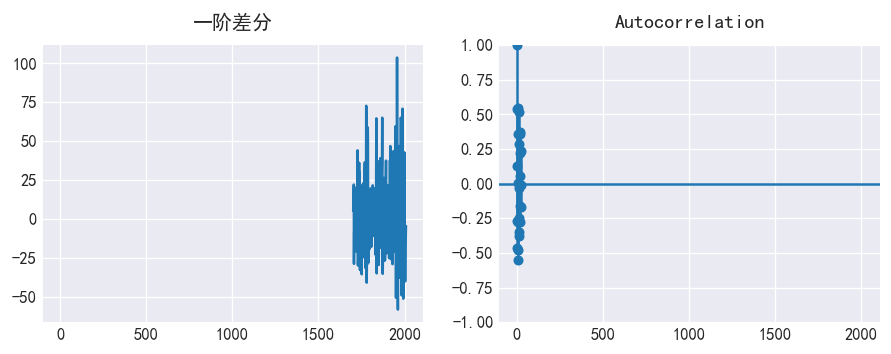

In [159]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.SUNACTIVITY.diff())
axes[0].set_title('一阶差分')
axes[1].set(ylim=(0, 1.2))
plot_acf(df.SUNACTIVITY.diff().dropna(), ax=axes[1])
plt.show()

**观察Acf图像可以知道,$p-value$最好取1,取2时候已经出现over-stationa**

In [166]:
from pmdarima.arima import AutoARIMA

model = AutoARIMA()

In [167]:
model.fit(df.SUNACTIVITY)

AutoARIMA()

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  309
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1280.477
Date:                Sat, 07 Jan 2023   AIC                           2572.954
Time:                        22:04:52   BIC                           2595.335
Sample:                             0   HQIC                          2581.903
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6145      0.026     62.096      0.000       1.564       1.665
ar.L2         -0.9354      0.022    -41.820      0.000      -0.979      -0.892
ma.L1         -1.4392      0.059    -24.590      0.000      -1.554      -1.324
ma.L2          0.4545      0.095      4.783      0.000       0.268       0.641
ma.L3          0.1285      0.060      2.143      0.032       0.011       0.246
sigma2       236.7573     16.333     14.495      0.000     204.744     268.770
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.72
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             0.54
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [175]:
pred = model.fit_predict(df.SUNACTIVITY)
# plt.plot(df.SUNACTIVITY.values[:-10],c='k')
type(pred)


pandas.core.series.Series

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


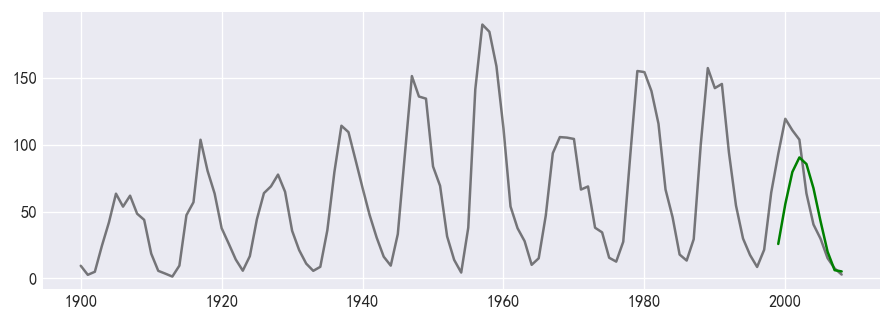

In [188]:
pred.index = df.index.values[-10:]
plt.plot(df.index[200:], df.SUNACTIVITY.values[200:], c='k',alpha = 0.5)
plt.plot(pred, c='g')
plt.legend()
plt.show()

In [164]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.SUNACTIVITY, order=(1, 2, 4))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 2, 4)   Log Likelihood               -1348.485
Date:                Sat, 07 Jan 2023   AIC                           2708.969
Time:                        21:53:10   BIC                           2731.330
Sample:                             0   HQIC                          2717.911
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9735      0.029    -33.914      0.000      -1.030      -0.917
ma.L1          0.6191      1.276      0.485      0.628      -1.882       3.121
ma.L2         -0.6526      0.775     -0.842      0.400      -2.172       0.866
ma.L3         -0.6193      0.424     -1.461      0.144      -1.450       0.211
ma.L4         -0.3472      0.057     -6.040      0.000      -0.460      -0.235
sigma2       374.5883      0.008   4.79e+04      0.000     374.573     374.604
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                32.24
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.7e+20. Standard errors may be unstable.
"""

`coef`一栏中是各个参数的值.而且$P>|z|$一栏之中,各项的值应该小于0.05.所以,我们应该重新训练模型

In [129]:
model = ARIMA(df.value, order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   7.328
Date:                Sat, 07 Jan 2023   AIC                             -8.657
Time:                        21:25:07   BIC                             -4.453
Sample:                             0   HQIC                            -7.312
                                 - 31                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.018     56.529      0.000       0.965       1.034
ma.L1         -0.9845      0.757     -1.300      0.193      -2.468       0.499
sigma2         0.0329      0.030      1.084      0.278      -0.027       0.092
===================================================================================
Ljung-Box (L1) (Q):                   1.16   Jarque-Bera (JB):                 1.80
Prob(Q):                              0.28   Prob(JB):                         0.41
Heteroskedasticity (H):               1.06   Skew:                            -0.33
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

此次$P<|z|$一栏的数值有所减小,但是还达不到要求

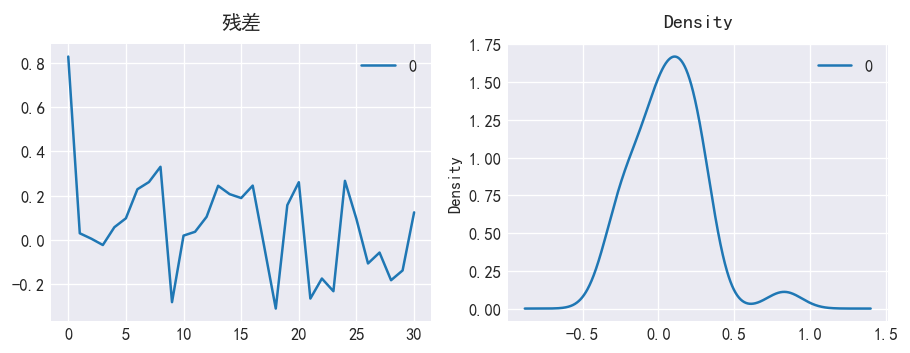

In [131]:
residuals = pd.DataFrame(model_fit.resid)
fig, axes = plt.subplots(1, 2)
residuals.plot(title='残差', ax=axes[0])
residuals.plot(kind='kde', title='Density', ax=axes[1])
plt.show()

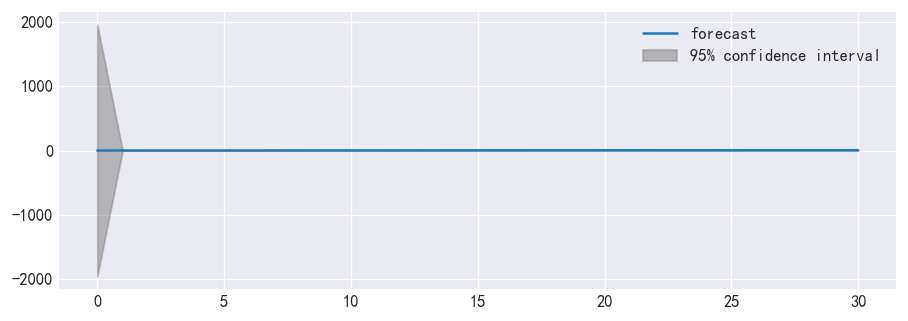

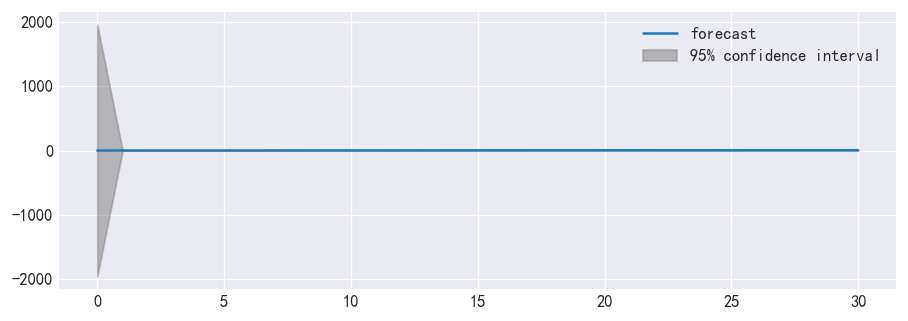

In [132]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(model_fit)